# Import Libraries

In [1]:
using DataFrames
using PyCall
using Statistics
using PlotlyJS

include("GenerateSyntheticData.jl")
include("MeanDecreaseImpurity.jl")

@pyimport sklearn.datasets as Datasets
@pyimport sklearn.ensemble as Ensemble
@pyimport sklearn.tree as Tree

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Generate Synthetic Test Data

In [2]:
X, y = getTestData(
    nFeatures=40,
    nInformative=5,
    nRedundant=30,
    nSamples=10_000,
    sigmaStd=1.0,
    randomState=0
);

# Fit MDI

In [3]:
classifier = Tree.DecisionTreeClassifier(
    criterion="entropy",
    max_features=1,
    class_weight="balanced",
    min_weight_fraction_leaf=0,
)

classifier = Ensemble.BaggingClassifier(
    base_estimator=classifier,
    n_estimators=1000,
    max_features=1.0,
    max_samples=1.0,
    oob_score=false
)

fit = classifier.fit(X |> Matrix, (y |> Matrix)[:, 1])

result = featureImportanceMDI(fit, names(X));

In [4]:
sort!(result, [:FeatureImportance], rev=false)

,FeatureName,FeatureImportance,Std
,String,Float64,Float64
1,N_3,0.0115216,8.80625e-5
2,N_5,0.0115728,8.97374e-5
3,N_1,0.0115894,8.9527e-5
4,N_4,0.0116941,9.24965e-5
5,N_2,0.0117963,8.78279e-5
6,R_8,0.017179,0.000183265
7,I_4,0.0172247,0.000175084
8,R_28,0.0172605,0.000183645
9,R_5,0.0173836,0.00018594


# Plot Results

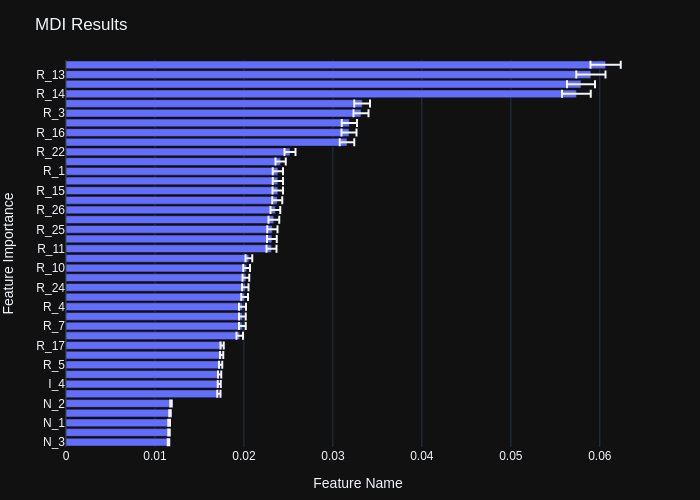

In [5]:
templates.default = "plotly_dark";
PlotlyJS.templates

toSavePlot = plot(
    bar(
        result,
        x=:FeatureImportance,
        y=:FeatureName,
        error_x=attr(type="data", array=:Std, visible=true),
        orientation="h",
        )
    ,
    PlotlyJS.Layout(
        title="MDI Results",
        width=800, height=1200,
        xaxis_title="Feature Name",
        yaxis_title="Feature Importance",
    )
)


# Save Results

In [6]:
PlotlyJS.savefig(toSavePlot, "Figs/MDI_results.png")


"Figs/MDI_results.png"